<a href="https://colab.research.google.com/github/HrishiGhodke/CODSOFT/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("/content/advertising.csv")

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [33]:
#Creating one copy of the DataSet
df1=df.copy()
df1

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [6]:
print(df1.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


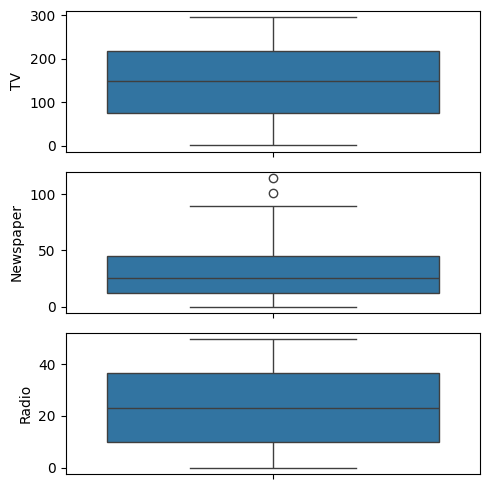

In [8]:
#Finding outLiers
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df1['TV'], ax = axs[0])
plt2 = sns.boxplot(df1['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df1['Radio'], ax = axs[2])
plt.tight_layout()


EDA


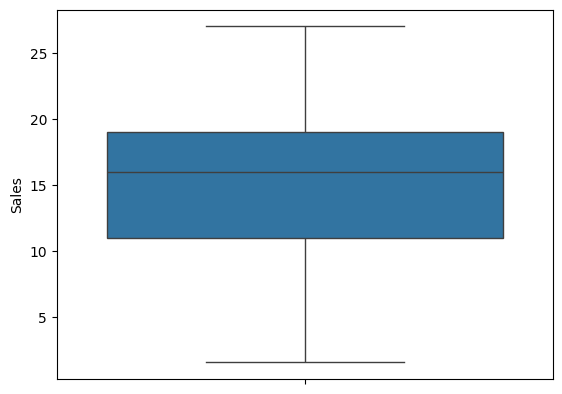

In [10]:
#Target Variable is Sales
sns.boxplot(df1['Sales'])
plt.show()

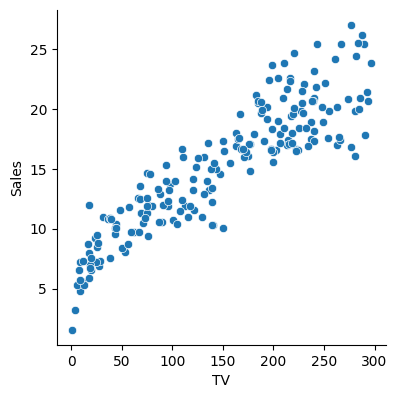

In [11]:
# Sales vs TV using Scatter Plot
sns.pairplot(df1, x_vars=['TV'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

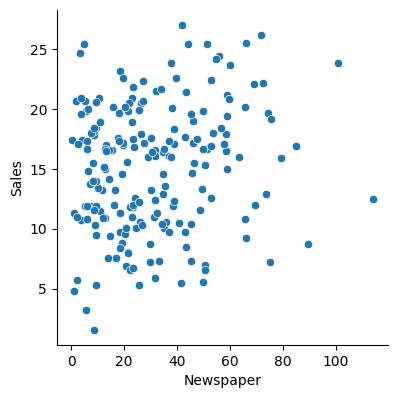

In [12]:
# Sales vs NewsPaper using Scatter Plot
sns.pairplot(df1, x_vars=['Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

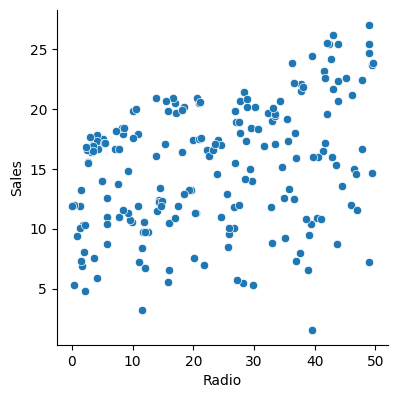

In [13]:
# Sales vs Radio using Scatter Plot
sns.pairplot(df1, x_vars=['Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

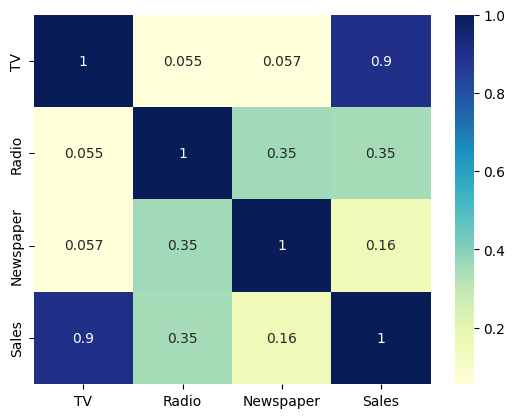

In [14]:
#Correlation between different variables.
sns.heatmap(df1.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Building Model


In [15]:
X = df1['TV']
y = df1['Sales']

In [16]:
#Split the Data(Train and Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [17]:
X_train.head()

,TV
74,213.4
3,151.5
185,205.0
26,142.9
90,134.3


In [18]:
y_train.head()

,Sales
74,17.0
3,16.5
185,22.6
26,15.0
90,14.0


In [20]:
#Using Liner Model
import statsmodels.api as sm
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using OLS
lr = sm.OLS(y_train, X_train_sm).fit()

In [21]:
lr.params

,0
const,6.948683
TV,0.054546


In [22]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 24 Aug 2024   Prob (F-statistic):           1.52e-52
Time:                        17:01:25   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

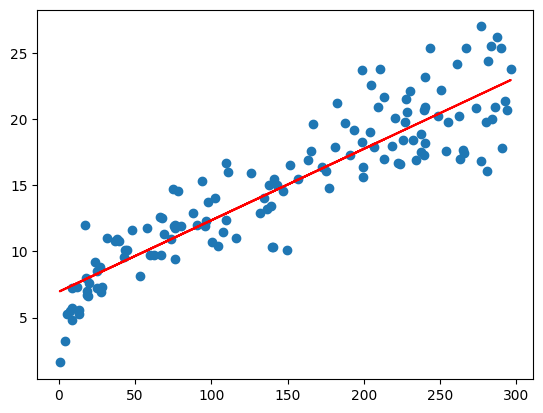

In [23]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

## Model Evaluation

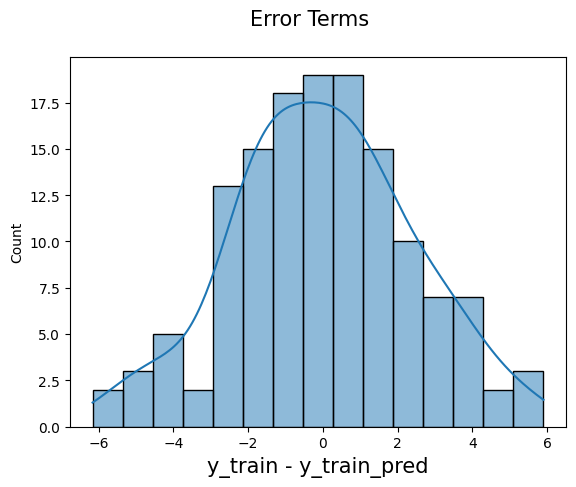

In [25]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)
fig = plt.figure()
sns.histplot(res, bins=15, kde=True)
fig.suptitle('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()


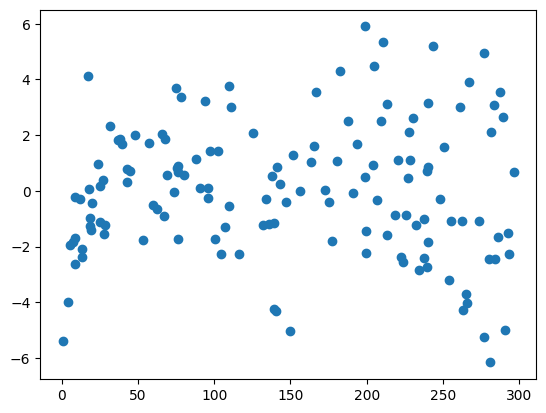

In [26]:
plt.scatter(X_train,res)
plt.show()

## Predictions on the Test Set

In [27]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [28]:
y_pred.head()

,0
126,7.374140
104,19.941482
99,14.323269
92,18.823294
111,20.132392


In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
#Looking at "RMSE"
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

In [31]:
#Checking R-squared(test set)
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

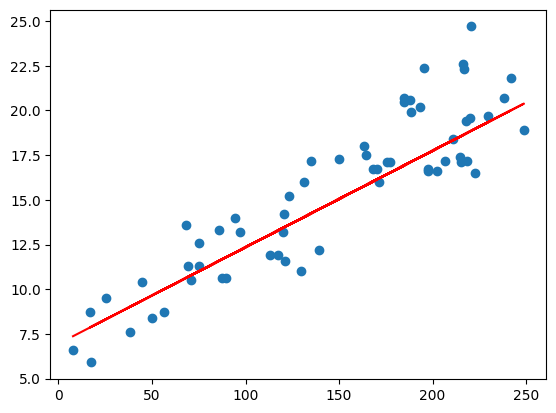

In [32]:
#Visualizing the fit on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()